In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

Questions
1. Which airport has the highest delay minutes? (destination & orginal airport)
2. Which Airlines has the most delay minutes?
3. What season has the most amounts of delaied flights?
4. What kind of things cause the departure and arrival delay?
5. The trend of delay from 2018-2023?
6. Which airlinme have the highest on-time performance?
7. What are the primary cause of flight delay?
8. How delay vary by time(Monthly/Yarly)?
9. most disrupted airports.

In [2]:
data = "/kaggle/input/flights-delay/flights_sample_3m.csv"
df = pd.read_csv(data)

## Data Exploration ## 
An over view of summary statistic of the dataset and create variables and functions for the analysis

In [3]:
df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN


In [4]:
Req_cols= ['FL_DATE','AIRLINE','FL_NUMBER','ORIGIN_CITY','DEST_CITY','DEP_DELAY','CANCELLED','ARR_DELAY','AIR_TIME','DISTANCE','DELAY_DUE_CARRIER','DELAY_DUE_WEATHER','DELAY_DUE_NAS','DELAY_DUE_SECURITY','DELAY_DUE_LATE_AIRCRAFT']

In [5]:
Cancelled = ['FL_DATE','FL_NUMBER','CANCELLED','DIVERTED','AIRLINE']

In [6]:
#new data frames as per the use 
df1 = df[Req_cols].copy()
df2 = df[Cancelled].copy()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   FL_NUMBER                int64  
 3   ORIGIN_CITY              object 
 4   DEST_CITY                object 
 5   DEP_DELAY                float64
 6   CANCELLED                float64
 7   ARR_DELAY                float64
 8   AIR_TIME                 float64
 9   DISTANCE                 float64
 10  DELAY_DUE_CARRIER        float64
 11  DELAY_DUE_WEATHER        float64
 12  DELAY_DUE_NAS            float64
 13  DELAY_DUE_SECURITY       float64
 14  DELAY_DUE_LATE_AIRCRAFT  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 343.3+ MB


In [8]:
#checking the missing values
df1.isnull().sum()

FL_DATE                          0
AIRLINE                          0
FL_NUMBER                        0
ORIGIN_CITY                      0
DEST_CITY                        0
DEP_DELAY                    77644
CANCELLED                        0
ARR_DELAY                    86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER          2466137
DELAY_DUE_NAS              2466137
DELAY_DUE_SECURITY         2466137
DELAY_DUE_LATE_AIRCRAFT    2466137
dtype: int64

In [9]:
df1 = df1.dropna(subset=['DEP_DELAY', 'ARR_DELAY','AIR_TIME'])

In [10]:
# Check missing value of each column
df1.isnull().sum()

FL_DATE                          0
AIRLINE                          0
FL_NUMBER                        0
ORIGIN_CITY                      0
DEST_CITY                        0
DEP_DELAY                        0
CANCELLED                        0
ARR_DELAY                        0
AIR_TIME                         0
DISTANCE                         0
DELAY_DUE_CARRIER          2379939
DELAY_DUE_WEATHER          2379939
DELAY_DUE_NAS              2379939
DELAY_DUE_SECURITY         2379939
DELAY_DUE_LATE_AIRCRAFT    2379939
dtype: int64

*we can remove the data of cancelled flight cause as we are doing delay analysis*

In [11]:
df1= df1[df1['CANCELLED'] == 0]

In [12]:
df1['CANCELLED'].value_counts()

CANCELLED
0.0    2913802
Name: count, dtype: int64

In [13]:
#checking duplicate values
df1.duplicated().any()

np.False_

In [14]:
#shape of the data frame 
df1.shape

(2913802, 15)

In [15]:
df1.describe()

,FL_NUMBER,DEP_DELAY,CANCELLED,ARR_DELAY,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,2.913802e+06,2.913802e+06,2913802.0,2.913802e+06,2.913802e+06,2.913802e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,2.508089e+03,1.005009e+01,0.0,4.260858e+00,1.123108e+02,8.107197e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,1.745981e+03,4.904988e+01,0.0,5.117482e+01,6.975484e+01,5.893703e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.000000e+00,-9.000000e+01,0.0,-9.600000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.049000e+03,-6.000000e+00,0.0,-1.600000e+01,6.100000e+01,3.780000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.149000e+03,-2.000000e+00,0.0,-7.000000e+00,9.500000e+01,6.530000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,3.790000e+03,6.000000e+00,0.0,7.000000e+00,1.420000e+02,1.047000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,9.562000e+03,2.966000e+03,0.0,2.934000e+03,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


## Data Transformation

In [16]:
delay_cols = [
  'DELAY_DUE_CARRIER',
  'DELAY_DUE_WEATHER',
  'DELAY_DUE_NAS',
  'DELAY_DUE_SECURITY',
  'DELAY_DUE_LATE_AIRCRAFT'
]

In [17]:
df1['DelayType'] = df1[delay_cols].gt(0).sum(axis=1).map({
    0: 'No Delay Cause',
    1: 'Single Cause',
}).fillna('Multiple Causes')

In [18]:
df1['PrimaryDelayCause'] = df1[delay_cols].idxmax(axis=1)
df1.loc[df1['DelayType'] == 'No Delay Cause', 'PrimaryDelayCause'] = 'None'
df1['PrimaryDelayCause'] = df1['PrimaryDelayCause'].str.replace('Delay', '')


In [19]:
df1['TotalDelayMinutes'] = df[delay_cols].sum(axis=1)

In [20]:
df1

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN_CITY,DEST_CITY,DEP_DELAY,CANCELLED,ARR_DELAY,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DelayType,PrimaryDelayCause,TotalDelayMinutes
0,2019-01-09,United Air Lines Inc.,1562,"Fort Lauderdale, FL","Newark, NJ",-4.0,0.0,-14.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN,No Delay Cause,None,0.0
1,2022-11-19,Delta Air Lines Inc.,1149,"Minneapolis, MN","Seattle, WA",-6.0,0.0,-5.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN,No Delay Cause,None,0.0
2,2022-07-22,United Air Lines Inc.,459,"Denver, CO","Minneapolis, MN",6.0,0.0,0.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN,No Delay Cause,None,0.0
3,2023-03-06,Delta Air Lines Inc.,2295,"Minneapolis, MN","San Francisco, CA",-1.0,0.0,24.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,Single Cause,DELAY_DUE_NAS,24.0
4,2020-02-23,Spirit Air Lines,407,"Orlando, FL","Dallas/Fort Worth, TX",-2.0,0.0,-1.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN,No Delay Cause,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,1522,"Jacksonville, FL","Charlotte, NC",-2.0,0.0,-16.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN,No Delay Cause,None,0.0
2999996,2022-11-02,American Airlines Inc.,1535,"Chicago, IL","Austin, TX",-6.0,0.0,-37.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN,No Delay Cause,None,0.0
2999997,2022-09-11,Delta Air Lines Inc.,2745,"Huntsville, AL","Atlanta, GA",41.0,0.0,36.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0,Single Cause,DELAY_DUE_WEATHER,36.0
2999998,2019-11-13,Republic Airline,6134,"Boston, MA","New York, NY",-5.0,0.0,-16.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN,No Delay Cause,None,0.0


In [21]:
df1['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [22]:
df1['DayType'] = np.where(
    df1['FL_DATE'].dt.weekday >= 5,
    'Weekend',
    'Weekday'
)
df1['DayName'] = df1['FL_DATE'].dt.day_name()


In [23]:
df1[['FL_DATE','DayType','DayName']].head()

,FL_DATE,DayType,DayName
0,2019-01-09,Weekday,Wednesday
1,2022-11-19,Weekend,Saturday
2,2022-07-22,Weekday,Friday
3,2023-03-06,Weekday,Monday
4,2020-02-23,Weekend,Sunday


In [24]:
df1['Route'] = df['ORIGIN'] + ' → ' + df['DEST']

In [25]:
df1['Route'].head()

0    FLL → EWR
1    MSP → SEA
2    DEN → MSP
3    MSP → SFO
4    MCO → DFW
Name: Route, dtype: object

# Feature Understanding

In [26]:
df1.head().T

,0,1,2,3,4
FL_DATE,2019-01-09 00:00:00,2022-11-19 00:00:00,2022-07-22 00:00:00,2023-03-06 00:00:00,2020-02-23 00:00:00
AIRLINE,United Air Lines Inc.,Delta Air Lines Inc.,United Air Lines Inc.,Delta Air Lines Inc.,Spirit Air Lines
FL_NUMBER,1562,1149,459,2295,407
ORIGIN_CITY,"Fort Lauderdale, FL","Minneapolis, MN","Denver, CO","Minneapolis, MN","Orlando, FL"
DEST_CITY,"Newark, NJ","Seattle, WA","Minneapolis, MN","San Francisco, CA","Dallas/Fort Worth, TX"
DEP_DELAY,-4.0,-6.0,6.0,-1.0,-2.0
CANCELLED,0.0,0.0,0.0,0.0,0.0
ARR_DELAY,-14.0,-5.0,0.0,24.0,-1.0
AIR_TIME,153.0,189.0,87.0,249.0,153.0
DISTANCE,1065.0,1399.0,680.0,1589.0,985.0


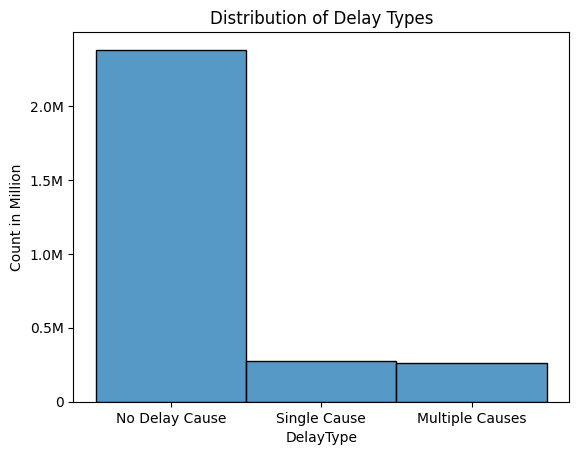

In [27]:
#distribution of Delay Types
ax = plt.gca()
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(
        lambda x, _: '0' if x == 0 else f'{x/1_000_000:.1f}M'
    )
)
sns.histplot(x='DelayType', data=df1)
plt.title("Distribution of Delay Types")
plt.ylabel('Count in Million')
plt.show()

# Which airlines has the most delay in minutes?

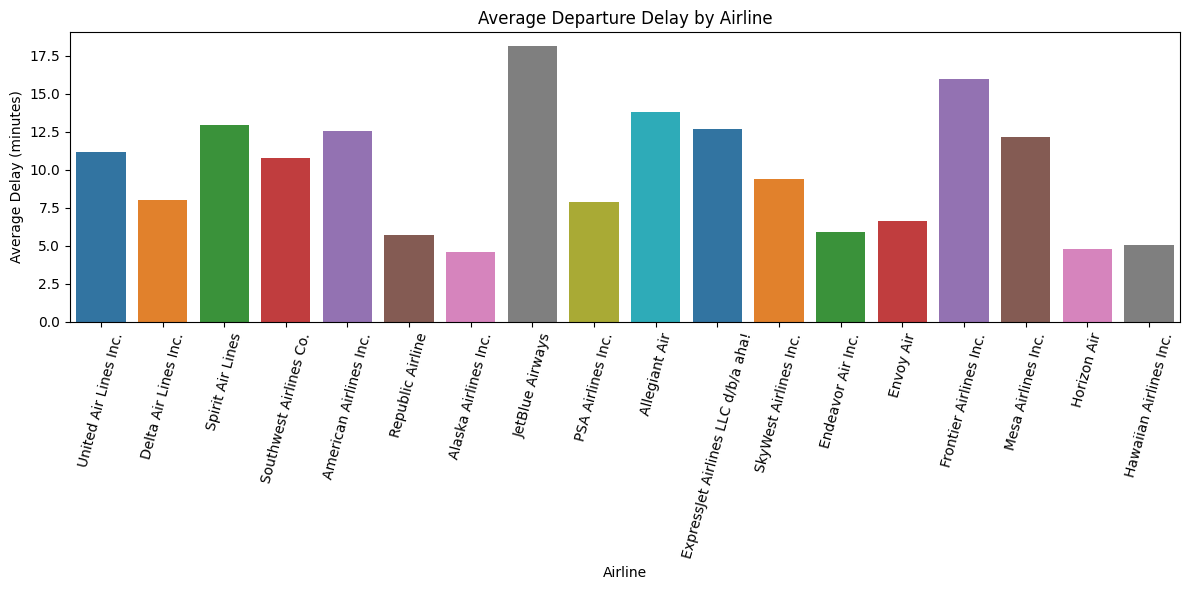

In [28]:
#delay by AIRLINE
plt.figure(figsize=(12,6))

sns.barplot(
    data=df1,
    x='AIRLINE',
    y='DEP_DELAY',
    estimator='mean',
    errorbar=None,
    palette='tab10'
)

plt.title("Average Departure Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [29]:
# The data of depaetures delay in each airline
df_airline_dep_delay = df1.groupby("AIRLINE")["DEP_DELAY"].describe()\
.sort_values(by = "mean", ascending = False)

df_airline_dep_delay.head()

,count,mean,std,min,25%,50%,75%,max
AIRLINE,,,,,,,,
JetBlue Airways,109447.0,18.132905,60.456501,-62.0,-7.0,-2.0,17.0,1834.0
Frontier Airlines Inc.,62711.0,15.949929,56.818734,-46.0,-8.0,-3.0,17.0,1375.0
Allegiant Air,50179.0,13.829391,66.644641,-51.0,-8.0,-3.0,13.0,1778.0
Spirit Air Lines,93200.0,12.948777,49.513580,-47.0,-5.0,-2.0,10.0,1302.0
ExpressJet Airlines LLC d/b/a aha!,17951.0,12.679182,71.567008,-54.0,-8.0,-5.0,1.0,1839.0


***JetBlue Airways*** shows the highest mean departure delay, the median delay across all airlines remains zero. This suggests that severe but infrequent delay events disproportionately impact the average, rather than consistent operational inefficiency.

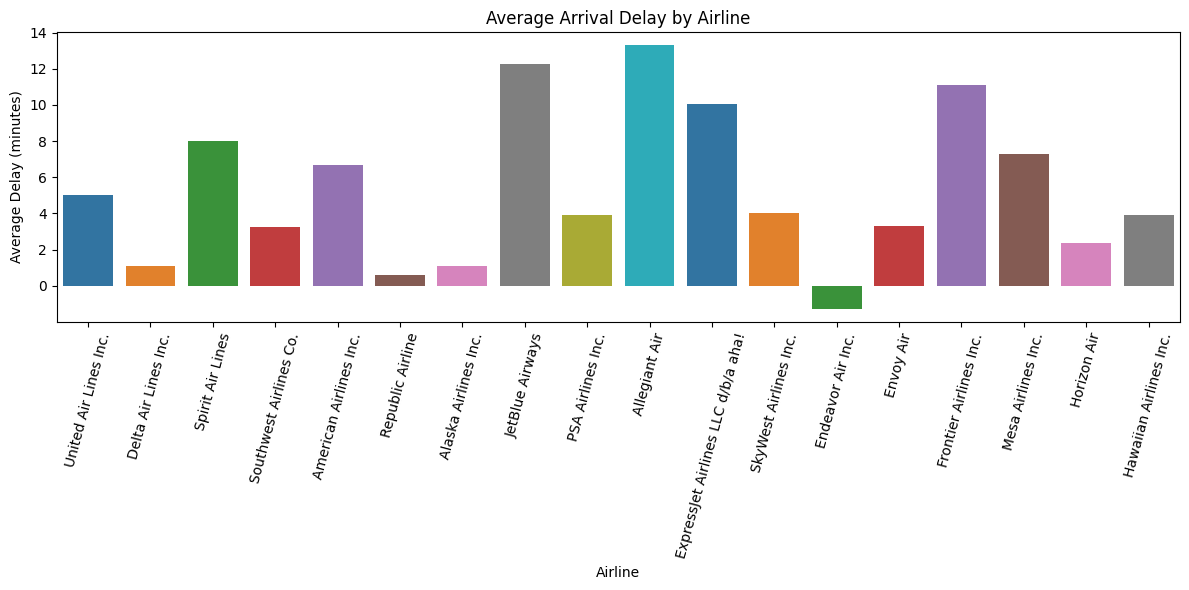

In [30]:
#delay by AIRLINE
plt.figure(figsize=(12,6))

sns.barplot(
    data=df1,
    x='AIRLINE',
    y='ARR_DELAY',
    estimator='mean',
    errorbar=None,
    palette='tab10'
)

plt.title("Average Arrival Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [31]:
# The data of Arrival delay in each airline
df_airline_arr_delay = df1.groupby("AIRLINE")["ARR_DELAY"].describe()\
.sort_values(by = "mean", ascending = False)

df_airline_arr_delay.head()

,count,mean,std,min,25%,50%,75%,max
AIRLINE,,,,,,,,
Allegiant Air,50179.0,13.284601,68.332133,-75.0,-12.0,-2.0,16.0,1736.0
JetBlue Airways,109447.0,12.276125,63.010324,-95.0,-17.0,-5.0,18.0,1815.0
Frontier Airlines Inc.,62711.0,11.100429,58.942065,-73.0,-16.0,-5.0,17.0,1416.0
ExpressJet Airlines LLC d/b/a aha!,17951.0,10.031976,73.545005,-79.0,-16.0,-6.0,10.0,1844.0
Spirit Air Lines,93200.0,8.029485,51.934919,-78.0,-14.0,-5.0,11.0,1294.0


The ***Allegiant Air*** has the most highest arrival delay time. The median of the arrival delay time of each airline are all 0. The median of average arrival time is 0 after the third places. So, the major reason of having high mean of delay minutes liing more on those flight which has high delay time for the arrival delay time.

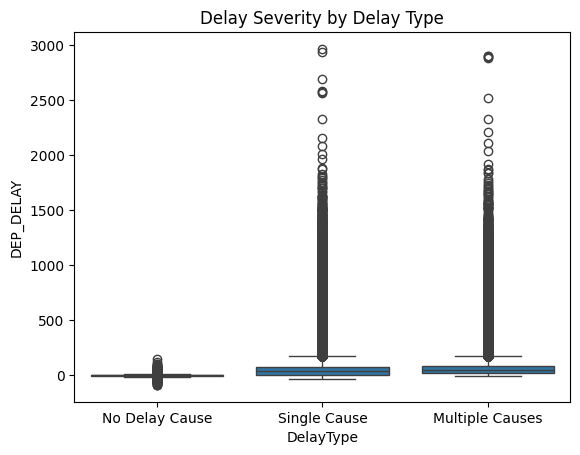

In [32]:
sns.boxplot(x='DelayType', y='DEP_DELAY', data=df1)
plt.title("Delay Severity by Delay Type")
plt.show()

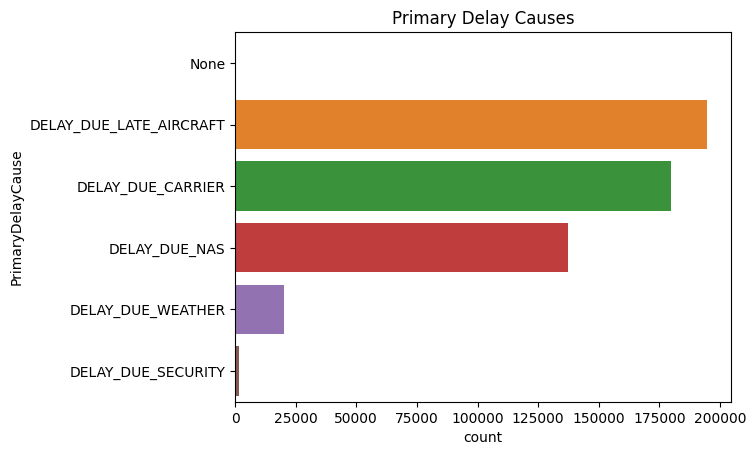

In [34]:
#Primary Delay Cause
sns.countplot(
    y='PrimaryDelayCause',
    data=df1[df1['DelayType'] != 'No Delay Cause'],
    order=df1['PrimaryDelayCause'].value_counts().index,
    palette='tab10'
)
plt.title("Primary Delay Causes")
plt.show()


The most delays originate from operational and network-related factors, particularly ***late-arriving aircraft*** and ***carrier-controlled issues***. External factors such as air traffic congestion and weather play a secondary but still significant role. Security-related delays remain minimal. Overall, delay propagation within airline networks is the dominant driver of system-wide delays.

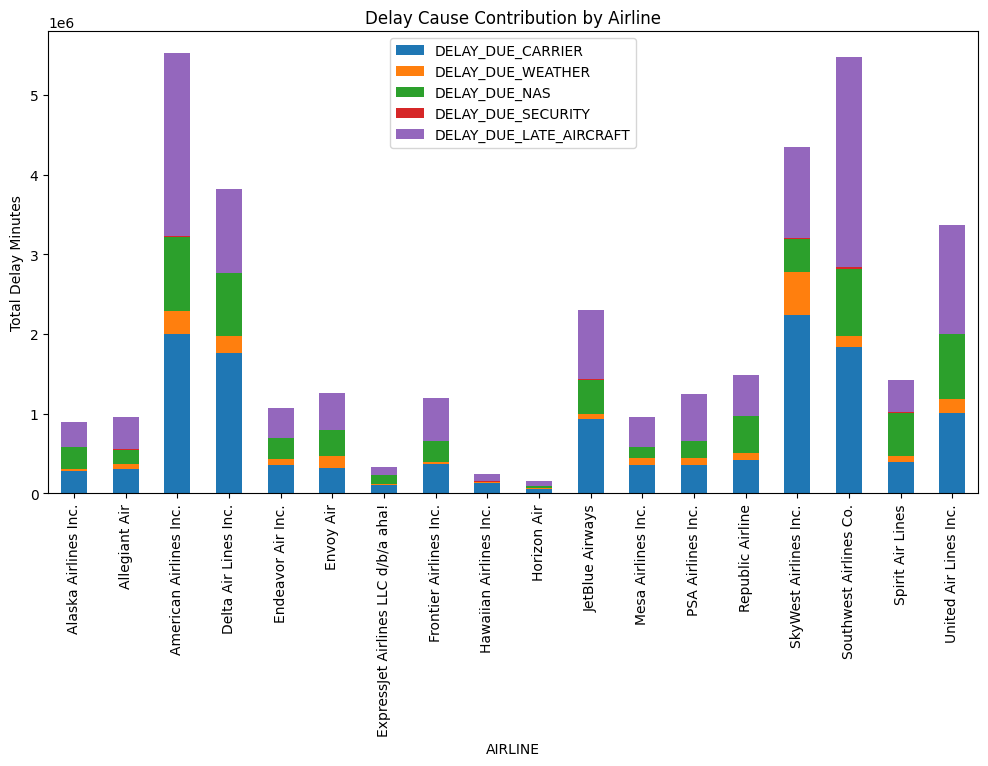

In [35]:
#Cause of Delay by Airline
cause_airline = df1.groupby('AIRLINE')[delay_cols].sum()

cause_airline.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Delay Cause Contribution by Airline")
plt.ylabel("Total Delay Minutes")
plt.show()

“This stacked bar chart illustrates the total delay minutes by airline, broken down by primary delay causes, highlighting both the scale and source of operational delays across carriers.”

In [36]:
df['AIRLINE'].value_counts()

AIRLINE
Southwest Airlines Co.                576470
Delta Air Lines Inc.                  395239
American Airlines Inc.                383106
SkyWest Airlines Inc.                 343737
United Air Lines Inc.                 254504
Republic Airline                      143107
Envoy Air                             121256
JetBlue Airways                       112844
Endeavor Air Inc.                     112463
PSA Airlines Inc.                     107050
Alaska Airlines Inc.                  100467
Spirit Air Lines                       95711
Mesa Airlines Inc.                     65012
Frontier Airlines Inc.                 64466
Allegiant Air                          52738
Hawaiian Airlines Inc.                 32114
Horizon Air                            20634
ExpressJet Airlines LLC d/b/a aha!     19082
Name: count, dtype: int64

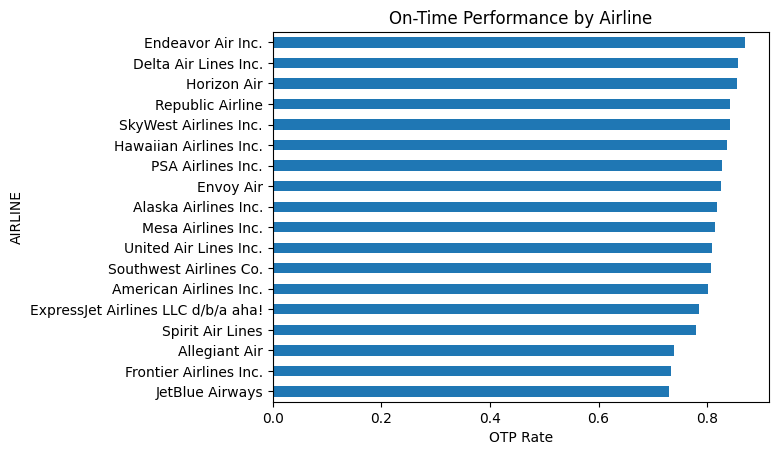

In [37]:
#Top Performers
otp = df1.groupby('AIRLINE')['DelayType'] \
        .apply(lambda x: (x == 'No Delay Cause').mean()) \
        .sort_values()

otp.plot(kind='barh')
plt.title("On-Time Performance by Airline")
plt.xlabel("OTP Rate")
plt.show()

***Endeavor Air Inc***. emerges as the best on-time performer, while ***JetBlue Airways*** records the lowest OTP rate. The analysis highlights a clear advantage for regional airlines in operational punctuality, with ***Delta Air Lines*** leading among major carriers.

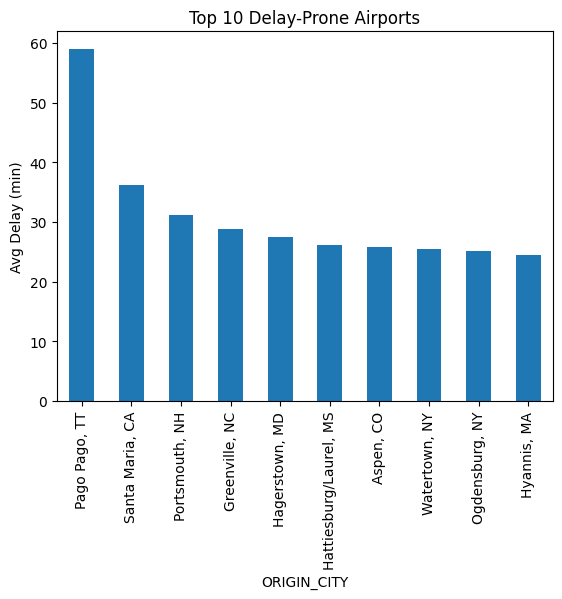

In [38]:
#Most Delay Prone Airport
top_airports = df1.groupby('ORIGIN_CITY')['DEP_DELAY'] \
                 .mean().sort_values(ascending=False).head(10)

top_airports.plot(kind='bar')
plt.title("Top 10 Delay-Prone Airports")
plt.ylabel("Avg Delay (min)")
plt.show()


In [39]:
df1["Month"] = df1["FL_DATE"].dt.month
df1["YEAR"] = df1["FL_DATE"].dt.year

# Monthly & Yearl trend of Delay

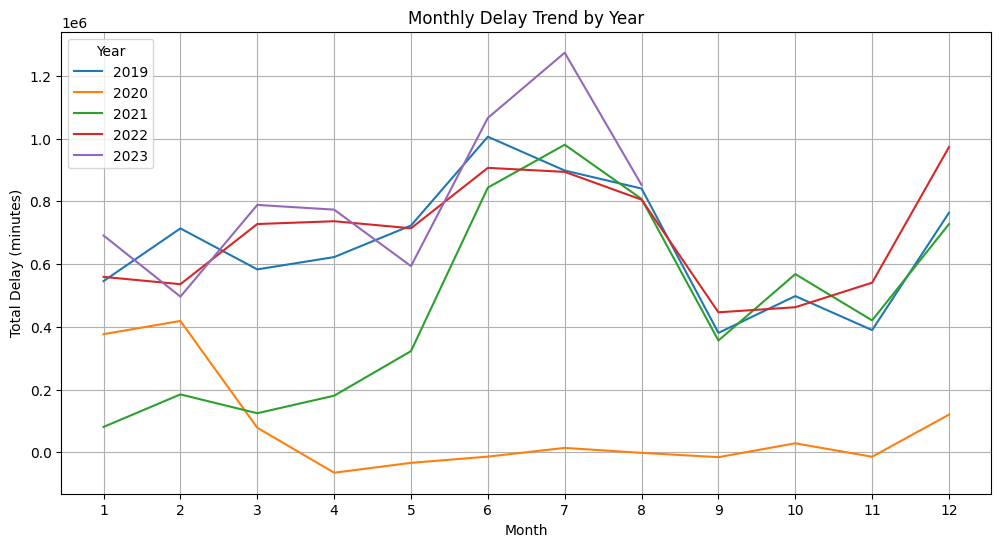

In [40]:
monthly_yearly_delay = (
    df1.groupby(['YEAR','Month'])['DEP_DELAY']
      .sum()
      .reset_index()
)
plt.figure(figsize=(12,6))

for year in monthly_yearly_delay['YEAR'].unique():
    temp = monthly_yearly_delay[monthly_yearly_delay['YEAR'] == year]
    plt.plot(temp['Month'], temp['DEP_DELAY'], label=year)

plt.title("Monthly Delay Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Delay (minutes)")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(True)
plt.show()


from this line chart we get a strong seasonal pattern in departure delays, with consistent peaks during summer months (June–July) and lower delays in early and post-summer periods. 



**Execption**




The COVID-19 impact is clearly visible in 2020, followed by a recovery and subsequent surge in delays during 2022 and 2023, indicating increased demand and operational strain.

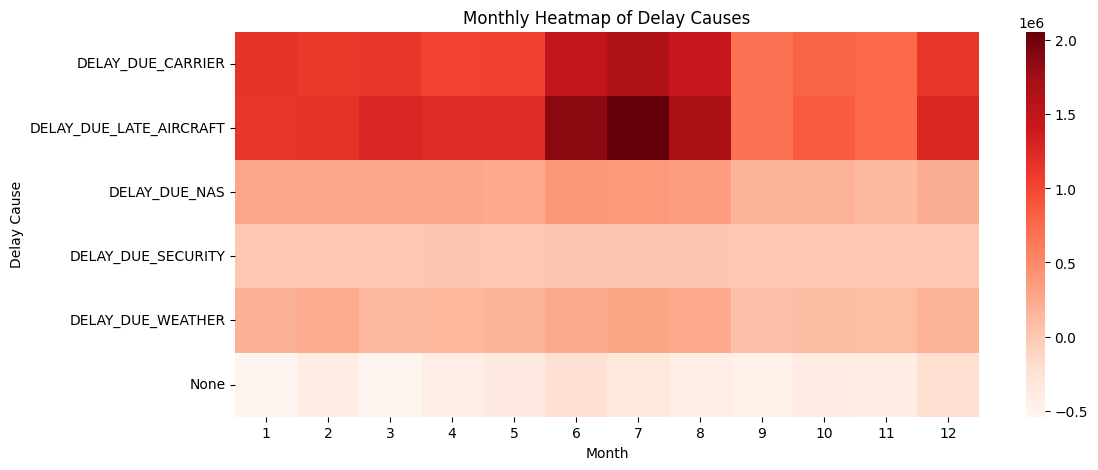

In [41]:
heatmap_data = (
    df1.groupby(['PrimaryDelayCause','Month'])['DEP_DELAY']
    .sum()
    .unstack()
)

plt.figure(figsize=(12,5))
sns.heatmap(heatmap_data, cmap='Reds', fmt='.0f')
plt.title("Monthly Heatmap of Delay Causes")
plt.xlabel("Month")
plt.ylabel("Delay Cause")
plt.show()


The heatmap reveals that ***Late aircraft*** and ***Carrier-related*** issues are the primary contributors to flight delays, particularly during peak summer months(*June-August*). ***NAS congestion*** further amplifies delays, while weather and security have comparatively lower impact. These patterns indicate that operational inefficiencies and peak-season congestion are the key drivers of delays.

# Cancellation Rate

In [57]:
cancellation_rate = (
    df2.groupby('AIRLINE')
      .agg(
          total_flights=('CANCELLED', 'count'),
          cancelled_flights=('CANCELLED', 'sum')
      )
      .reset_index()
)

cancellation_rate['cancellation_rate_pct'] = (
    cancellation_rate['cancelled_flights'] /
    cancellation_rate['total_flights'] * 100
)

In [46]:
df2['CANCELLED'].value_counts()

CANCELLED
0.0    2920860
1.0      79140
Name: count, dtype: int64

In [58]:
cancellation_rate = cancellation_rate.sort_values(
    by='cancellation_rate_pct',
    ascending=False
)

In [59]:
cancellation_rate

,AIRLINE,total_flights,cancelled_flights,cancellation_rate_pct
6,ExpressJet Airlines LLC d/b/a aha!,19082,1062.0,5.565454
1,Allegiant Air,52738,2383.0,4.518563
11,Mesa Airlines Inc.,65012,2373.0,3.650095
15,Southwest Airlines Co.,576470,19465.0,3.376585
13,Republic Airline,143107,4646.0,3.246522
12,PSA Airlines Inc.,107050,3301.0,3.083606
5,Envoy Air,121256,3633.0,2.996140
2,American Airlines Inc.,383106,10907.0,2.846993
10,JetBlue Airways,112844,3039.0,2.693098
7,Frontier Airlines Inc.,64466,1666.0,2.584308


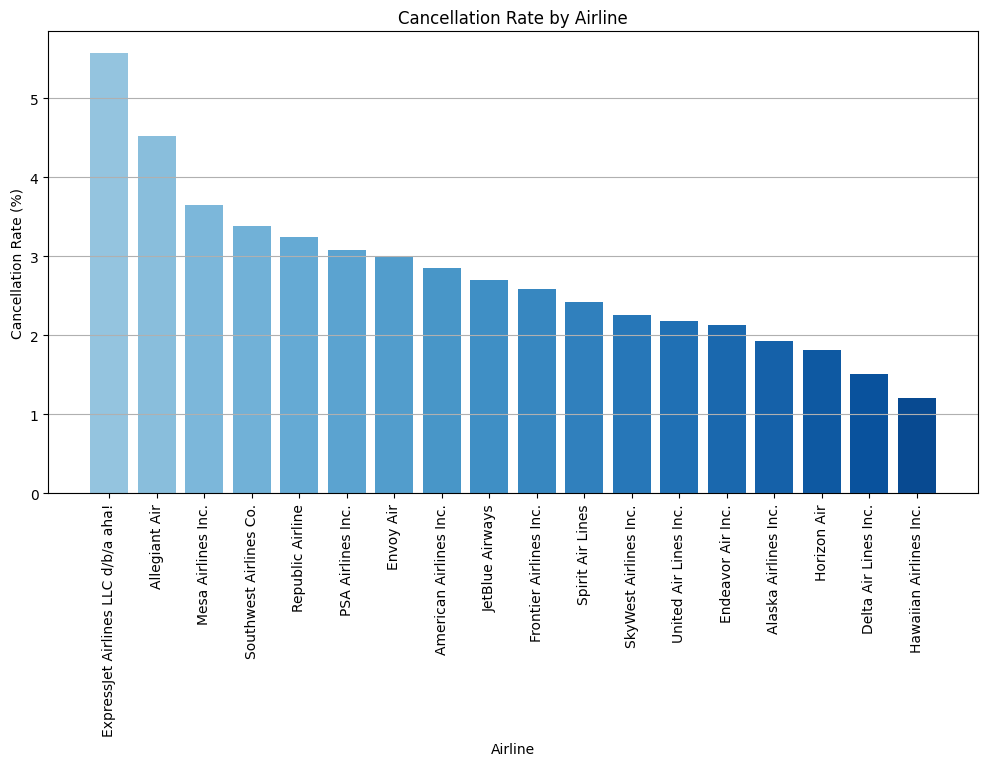

In [75]:
plt.figure(figsize=(12,6))
values = cancellation_rate['cancellation_rate_pct']
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(values)))
plt.bar(
    cancellation_rate['AIRLINE'],
    cancellation_rate['cancellation_rate_pct'],
    color = colors
)

plt.xticks(rotation=90)
plt.title("Cancellation Rate by Airline")
plt.xlabel("Airline")
plt.ylabel("Cancellation Rate (%)")
plt.grid(axis='y')
plt.show()


Airline-wise cancellation rate analysis shows significant variability across carriers. ***ExpressJet*** and ***Allegiant*** exhibit the highest cancellation rates(~5.5%), while ***Hawaiian Airlines*** and ***Delta Air Lines*** demonstrate superior operational reliability. Overall, major airlines maintain lower cancellation rates than regional carriers, reflecting stronger network redundancy and operational resilience.